# Trial of different model complexities

In [94]:
perf=[]
cross_tot=[]
n=8
for i in np.arange(n)+1:
    
    clf = tree.DecisionTreeRegressor(max_depth=i)
    
    #clf = linear_model.LinearRegression()
    #poly=PolynomialFeatures(x)
    #poly.fit_transform(x)
    
    #clf=neighbors.KNeighborsRegressor(i)
    
    clf = clf.fit(x, y)
    #clf = clf.fit(xp, y)
    yp = clf.predict(x).reshape(-1,1)
    #yp = clf.predict(xp).reshape(-1,1)
    
    cross=cross_val_score(clf,x,y).mean() # This is a 3 folds cross-val. As the dataset is big, it's enough!
    #cross=cross_val_score(clf,xp,y).mean()
    cross_tot.append(cross)
    perf.append((i,mean_squared_error(y,yp),r2_score(y,yp),cross))
print("Complexity , RMSE , R2 , crossval_score")
perf

Complexity , RMSE , R2 , crossval_score


[(1, 21459.044300149246, 0.14155738044153643, 0.033292279518822),
 (2, 19182.840643968262, 0.23261410235002167, 0.09313603533597337),
 (3, 17763.682700422076, 0.28938576680930606, 0.10920752989007772),
 (4, 16640.875544176764, 0.33430228326663547, 0.18338515197594585),
 (5, 16039.636935643426, 0.358354092791324, 0.16815469671502573),
 (6, 15645.598592056429, 0.37411711108533763, 0.18271755087020838),
 (7, 15349.440406149077, 0.38596455430592047, 0.1817557007911461),
 (8, 14933.073477676677, 0.4026208001189211, 0.16709951031050166)]

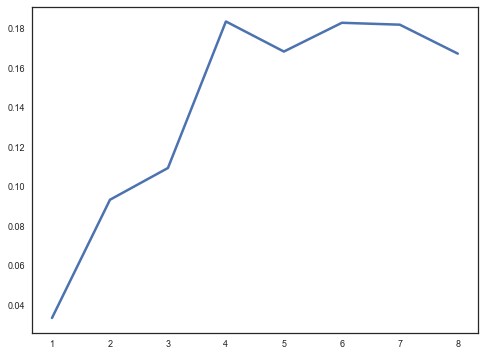

In [95]:
plt.plot(list(np.arange(n)+1),cross_tot,)

# Gradient boosting

Step 1: generate a first model

In [96]:
perf=[]
model_list=[] # lol
prediction = np.zeros((len(y),1))
clf = tree.DecisionTreeRegressor(max_depth=6) # it is the best one
#clf = linear_model.LinearRegression()
#clf=neighbors.KNeighborsRegressor(2)
clf = clf.fit(x, y)
model_list.append(clf)
yp = clf.predict(x).reshape(-1,1)
prediction += yp
y_residual = y-yp
perf.append((mean_squared_error(y,prediction),r2_score(y,prediction)))

Step 2: loop generating models trained in predicting the residuals of the previous model

In [97]:
no_boosting_runs = 100
for i in range(no_boosting_runs):
    clf = tree.DecisionTreeRegressor(max_depth=6) # it WAS the best one
    #clf = linear_model.LinearRegression()
    # suggested no_boosting_runs = 3 for KNN
    #clf=neighbors.KNeighborsRegressor(2)
    clf = clf.fit(x, y_residual)
    model_list.append(clf)
    yp = clf.predict(x).reshape(-1,1)
    # update the prediction
    prediction += yp
    y_residual = y-prediction
    perf.append((mean_squared_error(y,prediction),r2_score(y,prediction)))

In [98]:
print("RMSE , R2")
perf[-20:]

RMSE , R2


[(10265.004060253948, 0.5893611638985536),
 (10250.03880936558, 0.5899598303160916),
 (10243.761342970423, 0.5902109526224291),
 (10225.126335835848, 0.590956423115725),
 (10210.09188518921, 0.591557857784306),
 (10189.752347088524, 0.5923715159381149),
 (10178.30029892543, 0.5928296410105519),
 (10159.889264280047, 0.5935661517604576),
 (10150.826041524762, 0.5939287148166155),
 (10146.098063333113, 0.5941178517570722),
 (10137.579150259153, 0.594458640375275),
 (10119.631325220136, 0.595176620995771),
 (10108.513259652535, 0.5956213855060994),
 (10088.017197000532, 0.5964413052316717),
 (10075.952243991984, 0.5969239488070631),
 (10061.306268157596, 0.5975098430195642),
 (10048.925954563145, 0.5980051022065216),
 (10041.488749946104, 0.5983026184110807),
 (10027.947015737329, 0.5988443387982959),
 (10020.59883094739, 0.5991382938743861)]

Definition of a function to boosted model evaluation

In [99]:
def GradientBoosting_eval(models,x):
    prediction = np.zeros((len(x),1))
    for model in models:
        yp = model.predict(x).reshape(-1,1)
        prediction += yp
    return prediction.reshape(-1,1)

result=GradientBoosting_eval(model_list,x)

In [100]:
result

array([[466.0846229 ],
       [498.78884011],
       [498.48281163],
       ...,
       [297.61013953],
       [312.8130995 ],
       [272.79529979]])

In [101]:
model_list

[DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=6,